<a href="https://colab.research.google.com/github/Ashish-Kumar-Vaish/Cardiovascular-Risk-Classification/blob/main/Cardiovascular_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Ashish Kumar Vaish

# **Project Summary -**

This project focuses on predicting the 10-year risk of coronary heart disease (CHD) using patient-level clinical and behavioral data. Early prediction can lead to better preventive care and health outcomes. By analyzing a dataset containing various health metrics such as blood pressure, cholesterol levels, smoking status, and diabetes history, we aim to build a classification model that can accurately assess a person's risk of developing CHD over the next decade.

Our analysis began with a thorough exploration of the dataset. We identified missing values and outliers, handled them appropriately using imputation and capping methods, and ensured the dataset was clean and ready for modeling. We also examined the distribution and unique values of each variable and generated insightful visualizations to understand relationships and correlations among features.

For preprocessing, we handled missing values using mode and median imputation techniques, encoded categorical features using label encoding, and scaled numerical features using StandardScaler.

We implemented multiple classification models, including Logistic Regression, Random Forest, and others, and evaluated them using accuracy, precision, recall, and confusion matrix. We also performed hyperparameter tuning using GridSearchCV to optimize model performance.

This project demonstrates the potential of data-driven models in supporting medical decision-making and highlights the importance of early detection and risk factor analysis in preventing heart disease.

# **GitHub Link -**

https://github.com/Ashish-Kumar-Vaish/Cardiovascular-Risk-Classification

# **Problem Statement**


**The goal of this project is to predict whether an individual will develop coronary heart disease (CHD) within the next 10 years based on medical, demographic, and lifestyle data. Using features like age, smoking status, blood pressure, cholesterol, and glucose levels, we aim to build a machine learning model that helps identify high-risk individuals and supports early medical intervention.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [205]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Dataset Loading

In [206]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Projects/Cardiovascular Risk/data_cardiovascular_risk.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [207]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [208]:
# Dataset Rows & Columns count
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 3390
Columns: 17


### Dataset Information

In [209]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [210]:
# Dataset Duplicate Value Count
print("Duplicate Values:", df.duplicated().sum())

Duplicate Values: 0


#### Missing Values/Null Values

In [211]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


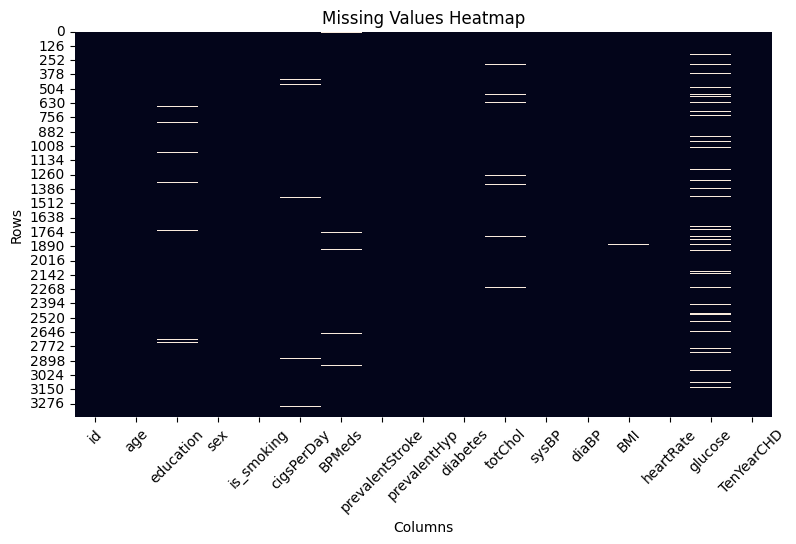

In [212]:
# Visualizing the missing values
plt.figure(figsize=(9, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

* Columns `education`, `cigsPerDay`, `BPMeds`, `totChol`, `BMI`, `glucose` contain missing values.
* Most variables are numerical, but `sex` and `is_smoking` are categorical.

## ***2. Understanding Your Variables***

In [213]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [214]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

* `id`: Unique identifier for each person
* `age`: Age of the person in years
* `education`: Education level (1 = less than high school, 2 = high school, 3 = college, 4 = post graduate)
* `sex`: Gender of the person (M = Male, F = Female)
* `is_smoking`: Whether the person is currently smoking (YES or NO)
* `cigsPerDay`: Number of cigarettes smoked per day
* `BPMeds`: Whether the person is on blood pressure medication (0 = No, 1 = Yes)
* `prevalentStroke`: History of stroke (0 = No, 1 = Yes)
* `prevalentHyp`: History of hypertension (0 = No, 1 = Yes)
* `diabetes`: Diabetes status (0 = No, 1 = Yes)
* `totChol`: Total cholesterol level (mg/dL)
* `sysBP`: Systolic blood pressure (mmHg)
* `diaBP`: Diastolic blood pressure (mmHg)
* `BMI`: Body Mass Index
* `heartRate`: Resting heart rate (beats per minute)
* `glucose`: Glucose level (mg/dL)
* `TenYearCHD`: CHD within 10 years (0 = No, 1 = Yes)

### Check Unique Values for each variable.

In [215]:
# Check Unique Values for each variable.
df.nunique()

,0
id,3390
age,39
education,4
sex,2
is_smoking,2
cigsPerDay,32
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [216]:
# Write your code to make your dataset analysis ready.
df.drop_duplicates(inplace=True)
df.drop('id', axis=1, inplace=True)

### What all manipulations have you done and insights you found?

* Removed duplicate rows to ensure data integrity.
* Dropped the `id` column as it is just an identifier.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

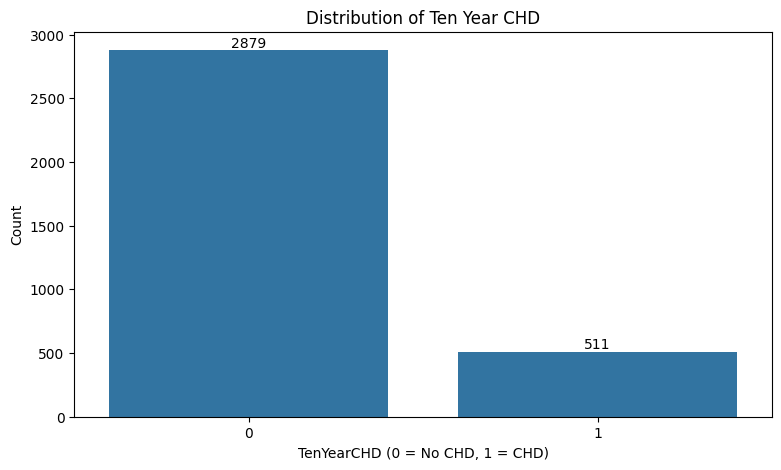

In [217]:
# Chart - 1 visualization code
plt.figure(figsize=(9, 5))
graph = sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of Ten Year CHD')
plt.xlabel('TenYearCHD (0 = No CHD, 1 = CHD)')
plt.ylabel('Count')

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

The dataset is imbalanced, most people did not develop CHD, while some did.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying imbalance helps choosing better modeling strategies to avoid biased predictions.

#### Chart - 2

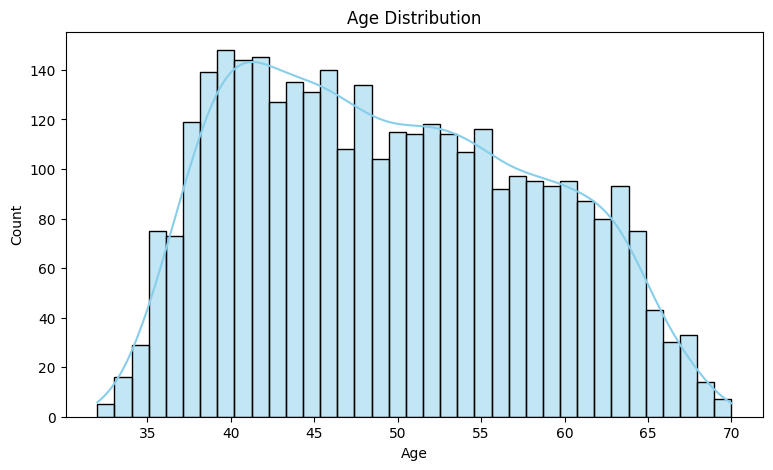

In [218]:
# Chart - 2 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['age'], bins=37, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

The distribution is slightly right-skewed, peaking around ages 40 to 45.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Age based grouping during model training.

#### Chart - 3

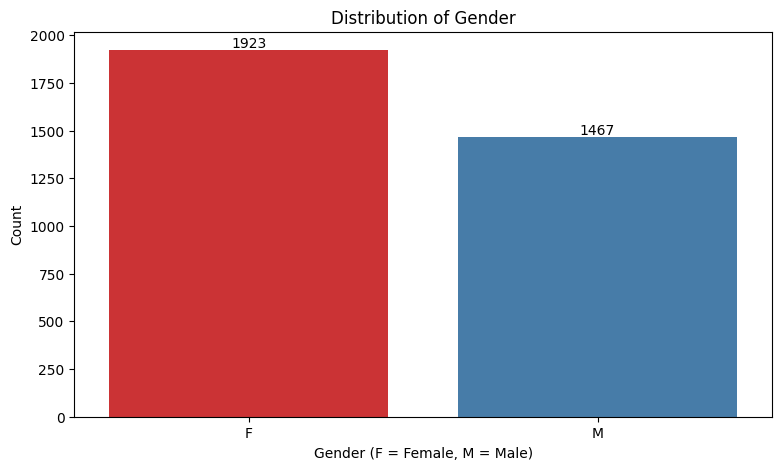

In [219]:
# Chart - 3 visualization code
plt.figure(figsize=(9, 5))
graph = sns.countplot(x='sex', data=df, hue='sex', legend=False, palette='Set1')
plt.title('Distribution of Gender')
plt.xlabel('Gender (F = Female, M = Male)')
plt.ylabel('Count')

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

The dataset contains more females individuals than males.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Gender imbalance might introduce bias in predictions.

#### Chart - 4

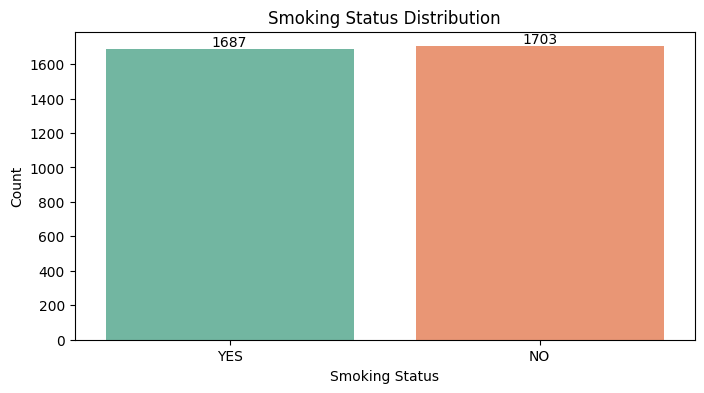

In [220]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 4))
graph = sns.countplot(x='is_smoking', data=df, hue='is_smoking', legend=False, palette='Set2')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

There's almost same number of smokers and non-smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

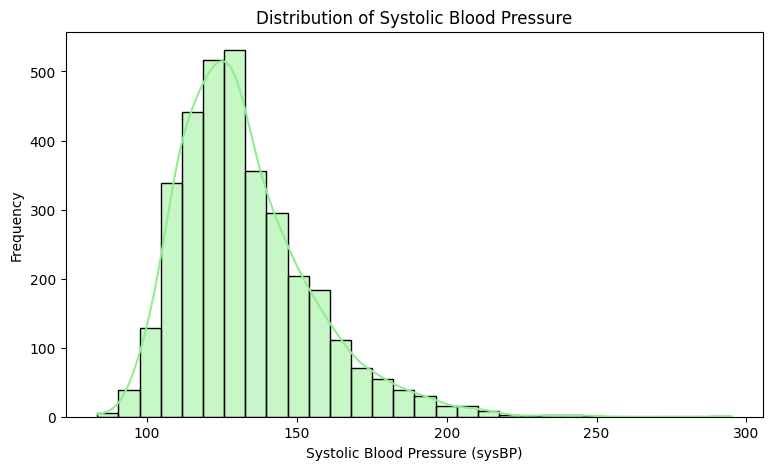

In [221]:
# Chart - 5 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['sysBP'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most individuals have systolic BP values between 100 and 160, though some exceeds 160.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

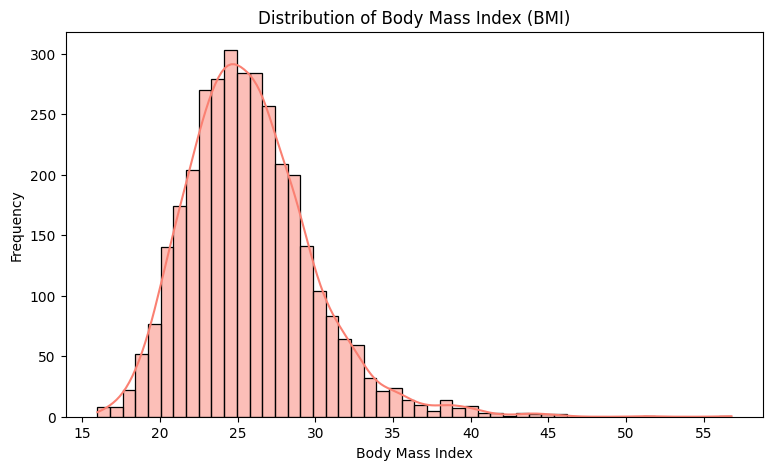

In [222]:
# Chart - 6 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['BMI'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most people have a BMI between 20 and 35.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strategies for managing weight that lower long-term medical issues.

#### Chart - 7

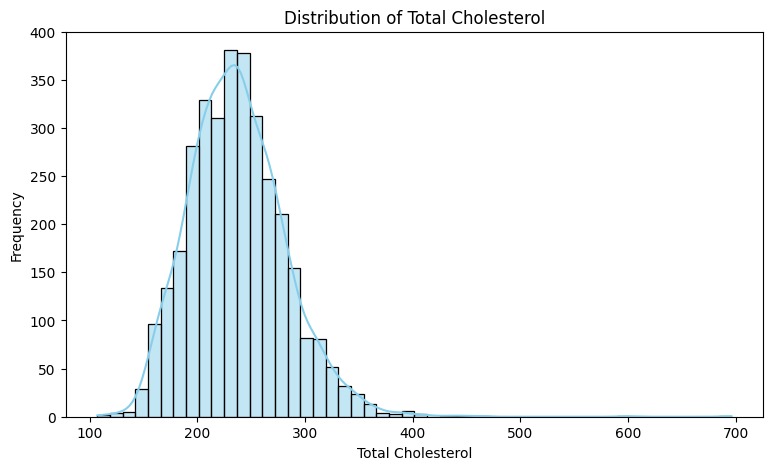

In [223]:
# Chart - 7 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['totChol'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

The cholesterol levels mostly fall between 150 and 350.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

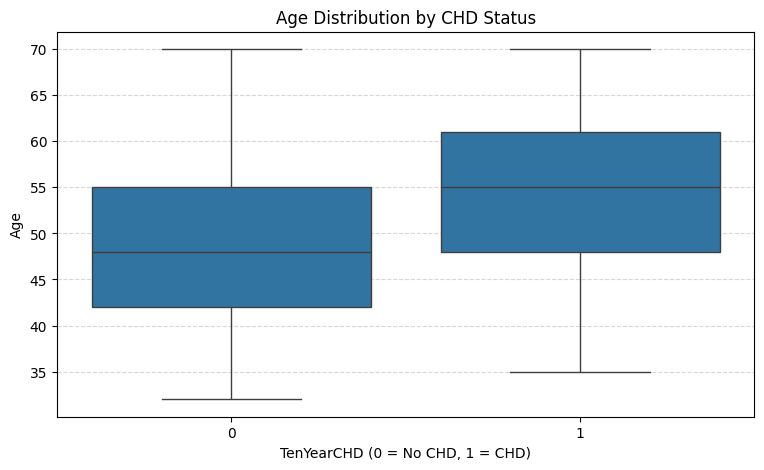

In [224]:
# Chart - 8 visualization code
plt.figure(figsize=(9, 5))
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age Distribution by CHD Status')
plt.xlabel('TenYearCHD (0 = No CHD, 1 = CHD)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are ideal for comparing the distribution of a numerical feature across two categories.

##### 2. What is/are the insight(s) found from the chart?

People who developed CHD are older on average than who did not developed CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This tells us that age is an important factor for CHD.

#### Chart - 9

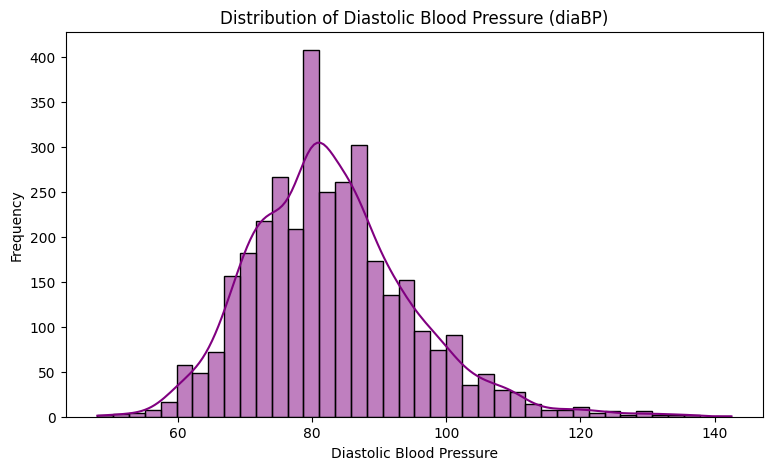

In [225]:
# Chart - 9 visualization code
plt.figure(figsize=(9, 5))
sns.histplot(df['diaBP'], bins=40, kde=True, color='purple')
plt.title('Distribution of Diastolic Blood Pressure (diaBP)')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for showing frequency patterns.

##### 2. What is/are the insight(s) found from the chart?

Most people have diastolic BP between 70 and 95.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify those who are at risk for preventive care.

#### Chart - 10

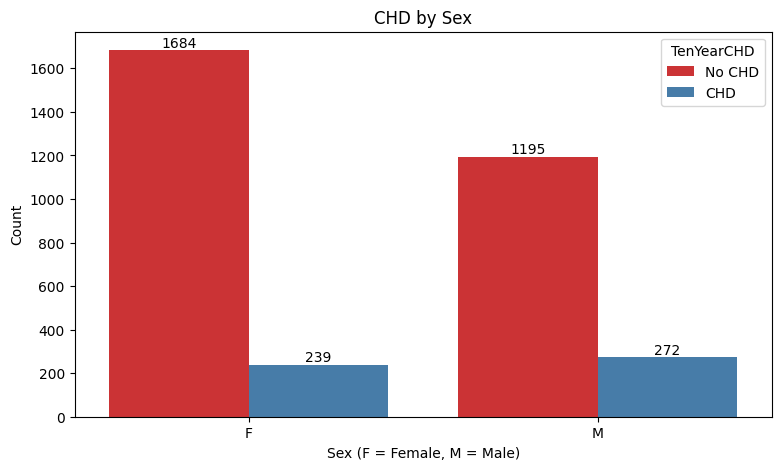

In [226]:
# Chart - 10 visualization code
plt.figure(figsize=(9, 5))
graph = sns.countplot(x='sex', hue='TenYearCHD', data=df, palette='Set1')
plt.title('CHD by Sex')
plt.xlabel('Sex (F = Female, M = Male)')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

* Both men and women have a high count in the non-CHD category.
* CHD cases are slightly higher among males compared to females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By recognizing that men may be more vulnerable, prevention initiatives can be taken appropriately.

#### Chart - 11

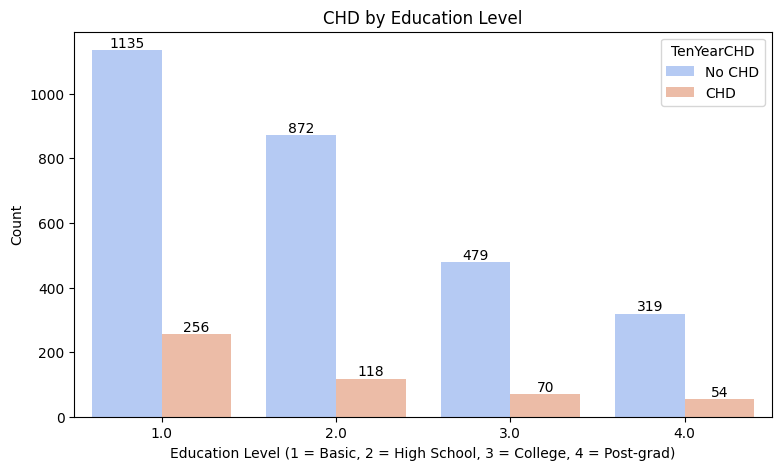

In [227]:
# Chart - 11 visualization code
plt.figure(figsize=(9, 5))
graph = sns.countplot(x='education', hue='TenYearCHD', data=df, palette='coolwarm')
plt.title('CHD by Education Level')
plt.xlabel('Education Level (1 = Basic, 2 = High School, 3 = College, 4 = Post-grad)')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

* People with basic education (1) have a higher number of CHD cases compared to those with higher education.
* As education increases, CHD cases decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Health campaigns can be more focused toward less educated populations.

#### Chart - 12

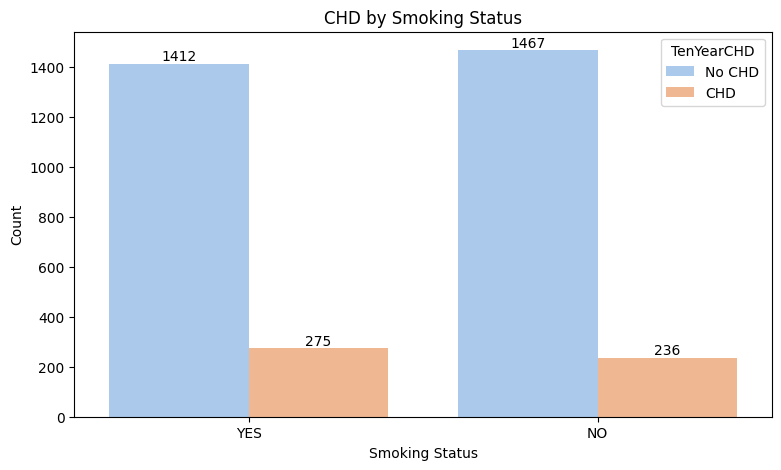

In [228]:
# Chart - 12 visualization code
plt.figure(figsize=(9, 5))
graph = sns.countplot(x='is_smoking', hue='TenYearCHD', data=df, palette='pastel')
plt.title('CHD by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

Smokers show slightly high CHD cases compared to non-smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Anti-smoking campaigns in CHD prevention programs.

#### Chart - 13

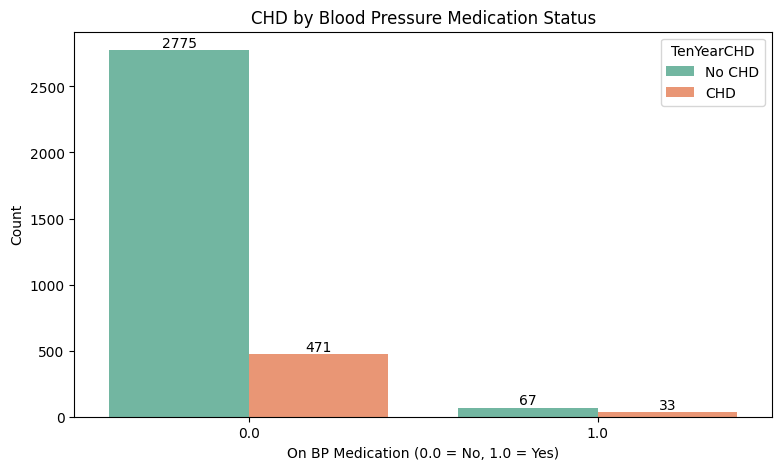

In [229]:
# Chart - 13 visualization code
plt.figure(figsize=(9, 5))
graph = sns.countplot(x='BPMeds', hue='TenYearCHD', data=df, palette='Set2')
plt.title('CHD by Blood Pressure Medication Status')
plt.xlabel('On BP Medication (0.0 = No, 1.0 = Yes)')
plt.ylabel('Count')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

for container in graph.containers:
    plt.bar_label(container)

plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best for visualizing the frequency of categorical values.

##### 2. What is/are the insight(s) found from the chart?

Most people are not on blood pressure medication.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

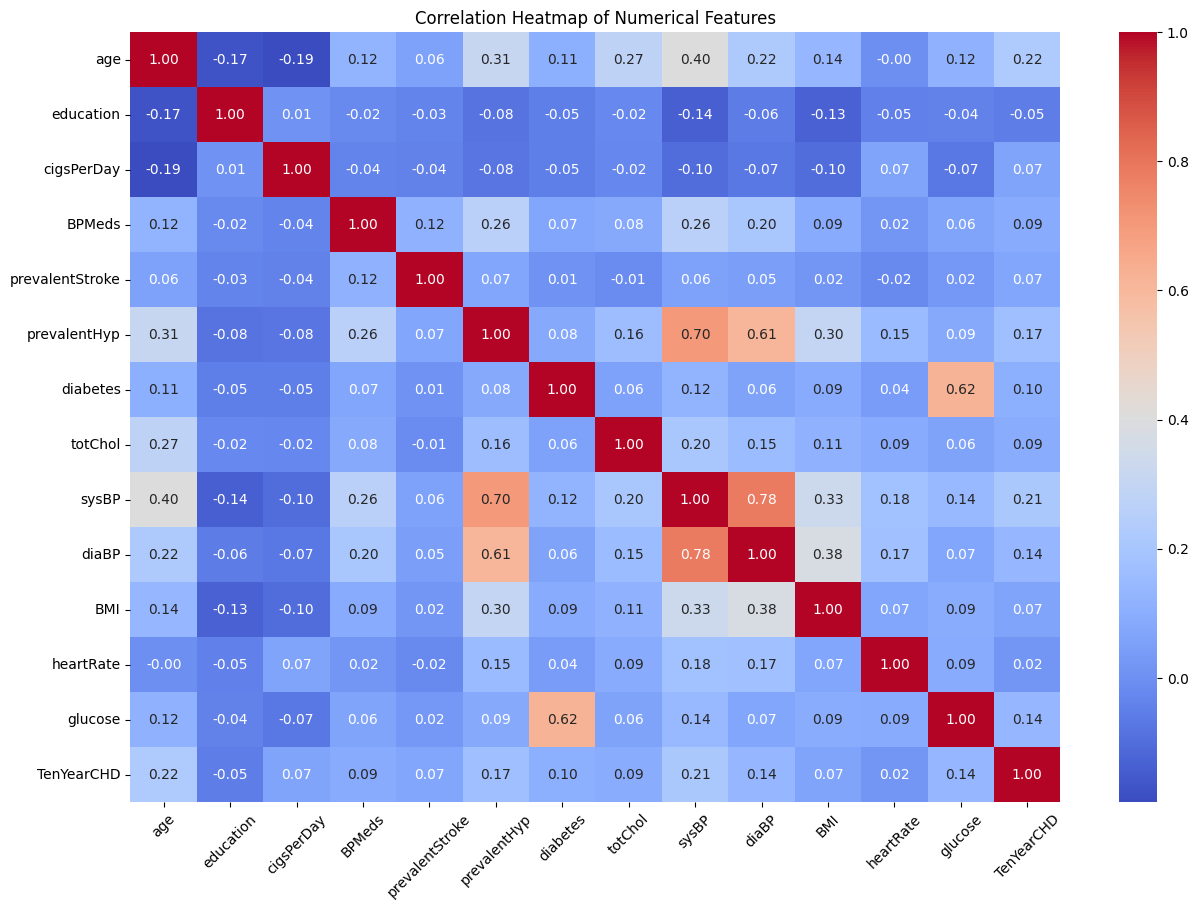

In [230]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap helps to visualize the strength of relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

* `age`, `sysBP`, and `prevalentHyp` show the strongest positive correlations with `TenYearCHD`.
* There is a very high correlation between `sysBP` and `diaBP` (0.78), `sysBP` and `prevalentHyp` (0.70), `glucose` and `diabetes` (0.62)

#### Chart - 15 - Pair Plot

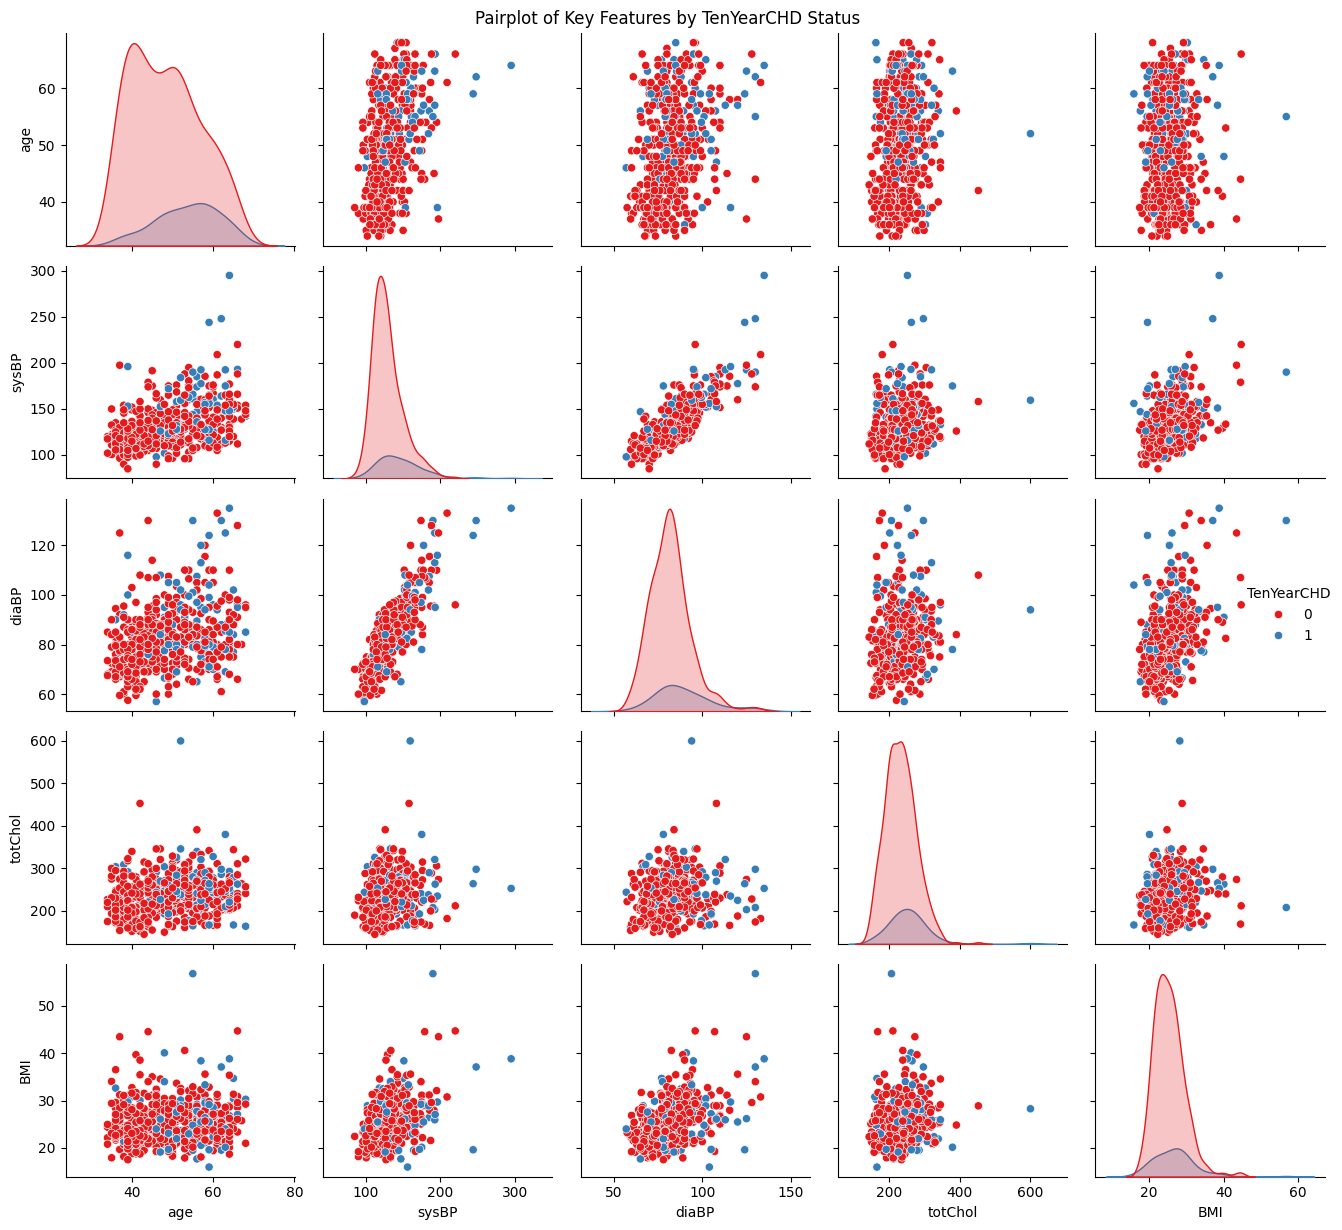

In [231]:
# Pair Plot visualization code
selected_features = df[['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'TenYearCHD']].copy()
selected_features = selected_features.sample(500, random_state=42)

sns.pairplot(selected_features, hue='TenYearCHD', palette='Set1')
plt.suptitle('Pairplot of Key Features by TenYearCHD Status')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows us to visualize pairwise relationships between multiple numerical variables in one view.

##### 2. What is/are the insight(s) found from the chart?

Systolic Blood Pressure (sysBP) and diastolic Blood Pressure (diaBP) are strongly correlated, creating a diagonal pattern.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [232]:
# Handling Missing Values & Missing Value Imputation
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [233]:
df.isnull().sum()

,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Used mode imputation for categorical features (education, BPMeds) and median imputation for numerical features (cigsPerDay, totChol, BMI, heartRate, glucose) to handle missing values.

### 2. Handling Outliers

In [234]:
# Handling Outliers & Outlier treatments
df.drop(df[df['totChol'] > 450].index, inplace=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Removed outliers for the totChol column by dropping rows where totChol is more than 450.

### 3. Categorical Encoding

In [235]:
# Encode your categorical columns
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['is_smoking'] = df['is_smoking'].map({'NO': 0, 'YES': 1})

#### What all categorical encoding techniques have you used & why did you use those techniques?

Used Label Encoding for binary categorical variables such as `sex` and `is_smoking`.

### 4. Data Scaling

In [236]:
# Scaling your data
scaler = StandardScaler()
scaled_columns = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'sysBP', 'diaBP']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

##### Which method have you used to scale you data and why?

Used StandardScaler for feature scaling. It standardizes features by removing the mean and scaling to unit variance.

### 5. Data Splitting

In [237]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42,stratify=y)

In [238]:
x_train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2954,-1.226991,2.0,0,1,0.925853,0.0,0,0,0,-0.015301,-0.250346,-0.405177,-2.016318,-0.080864,-0.246140
2832,1.565464,1.0,0,0,-0.759688,0.0,0,0,0,0.834426,0.108580,-0.072376,0.235434,0.754678,-1.110290
736,-1.459695,1.0,0,0,-0.759688,0.0,0,0,0,-1.278409,-0.541973,-0.238776,0.121020,-0.415081,-0.635008
2669,-0.063468,2.0,0,1,-0.675411,0.0,0,0,0,0.076561,-1.013062,-0.987577,-0.918437,-0.247973,0.099520
1137,1.565464,2.0,1,1,0.925853,0.0,0,1,0,0.627735,-0.138181,-0.030776,-0.214917,1.005340,0.056313


In [239]:
y_train.head()

,TenYearCHD
2954,0
2832,0
736,0
2669,0
1137,0


##### What data splitting ratio have you used and why?

I used an 85:15 train-test split using train_test_split. 85% of the data was used for training the model and 15% for testing.

### 6. Handling Imbalanced Dataset

In [240]:
print(df['TenYearCHD'].value_counts(normalize=True))

TenYearCHD
0    0.849675
1    0.150325
Name: proportion, dtype: float64


##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced. Around 85% of the samples belong to the non-CHD class (TenYearCHD = 0) and only 15% to the CHD class (TenYearCHD = 1). This skewed distribution can lead models to favor the majority class, achieving high accuracy while performing poorly on identifying CHD cases.

In [241]:
# Handling Imbalanced Dataset
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used SMOTE (Synthetic Minority Oversampling Technique) to handle the imbalance. SMOTE creates synthetic samples of the minority class by interpolating between existing instances. This helps avoid overfitting.

## ***6. ML Model Implementation***

### ML Model - 1

In [242]:
# ML Model - 1 Implementation
model_lr = LogisticRegression()

# Fit the Algorithm
model_lr.fit(x_train, y_train)

# Predict on the model
y_pred = model_lr.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Precision Score:", precision_score(y_test,y_pred,average=None))
print("Recall Score:", recall_score(y_test,y_pred,average=None))

Accuracy Score: 0.639763779527559
Confusion Matrix:
 [[269 163]
 [ 20  56]]
Precision Score: [0.93079585 0.25570776]
Recall Score: [0.62268519 0.73684211]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

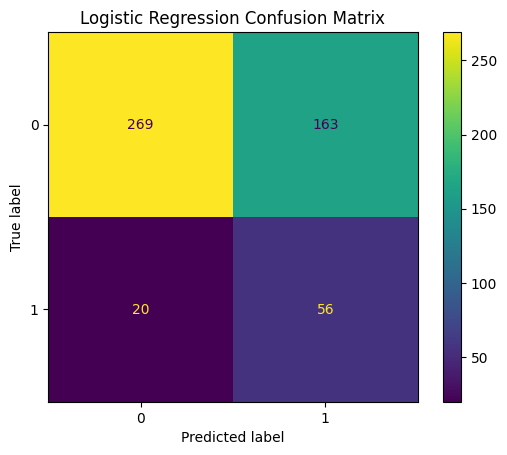

In [243]:
# Visualizing evaluation Metric Score chart
ConfusionMatrixDisplay.from_estimator(model_lr, x_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### ML Model - 2

In [244]:
# ML Model - 1 Implementation
model_dt = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
model_dt.fit(x_train, y_train)

# Predict on the model
y_pred = model_dt.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Precision Score:", precision_score(y_test,y_pred,average=None))
print("Recall Score:", recall_score(y_test,y_pred,average=None))

Accuracy Score: 0.6968503937007874
Confusion Matrix:
 [[333  99]
 [ 55  21]]
Precision Score: [0.85824742 0.175     ]
Recall Score: [0.77083333 0.27631579]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

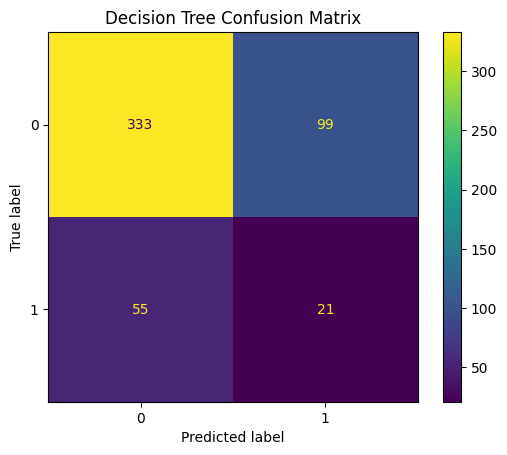

In [245]:
# Visualizing evaluation Metric Score chart
ConfusionMatrixDisplay.from_estimator(model_dt, x_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [246]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5, scoring='f1')

# Fit the Algorithm
grid.fit(x_train, y_train)

# Predict on the model
y_pred_grid = grid.best_estimator_.predict(x_test)

print("Best Parameters:", grid.best_params_)
print("Improved Accuracy Score:", accuracy_score(y_test, y_pred_grid))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Improved Precision Score:", precision_score(y_test, y_pred_grid, average=None))
print("Improved Recall Score:", recall_score(y_test, y_pred_grid, average=None))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Improved Accuracy Score: 0.6968503937007874
Improved Confusion Matrix:
 [[333  99]
 [ 55  21]]
Improved Precision Score: [0.85824742 0.175     ]
Improved Recall Score: [0.77083333 0.27631579]


##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV because it tests a grid of hyperparameters and identifies the best combination based on f1 score, which is ideal for imbalanced datasets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No.

### ML Model - 3

In [247]:
# ML Model - 3 Implementation
model_rf = RandomForestClassifier(random_state=42)

# Fit the Algorithm
model_rf.fit(x_train, y_train)

# Predict on the model
y_pred = model_rf.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Precision Score:", precision_score(y_test,y_pred,average=None))
print("Recall Score:", recall_score(y_test,y_pred,average=None))

Accuracy Score: 0.7775590551181102
Confusion Matrix:
 [[379  53]
 [ 60  16]]
Precision Score: [0.86332574 0.23188406]
Recall Score: [0.87731481 0.21052632]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

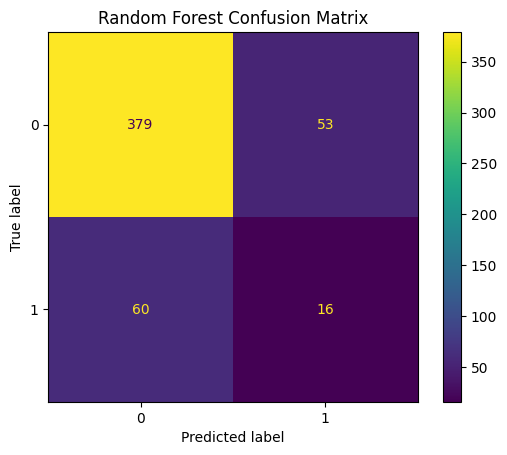

In [248]:
# Visualizing evaluation Metric Score chart
ConfusionMatrixDisplay.from_estimator(model_rf, x_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [249]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Fit the Algorithm
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param, cv=5, scoring='f1')
grid.fit(x_train, y_train)

# Predict on the model
y_pred_grid = grid.best_estimator_.predict(x_test)

print("Best Parameters:", grid.best_params_)
print("Improved Accuracy Score:", accuracy_score(y_test, y_pred_grid))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Improved Precision Score:", precision_score(y_test, y_pred_grid, average=None))
print("Improved Recall Score:", recall_score(y_test, y_pred_grid, average=None))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Improved Accuracy Score: 0.7775590551181102
Improved Confusion Matrix:
 [[379  53]
 [ 60  16]]
Improved Precision Score: [0.86332574 0.23188406]
Improved Recall Score: [0.87731481 0.21052632]


##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV because it tests a grid of hyperparameters and identifies the best combination based on f1 score, which is ideal for imbalanced datasets.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* accuracy_score: Shows overall correctness, but can be misleading with imbalanced data.
* confusion_matrix: Helps understand false negatives and false positives.
* precision_score: Tells how many predicted CHD cases were actually correct.
* recall_score: How many actual CHD cases were correctly caught.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected Logistic Regression trained on SMOTE-balanced data as the final prediction model because it achieved the highest recall for the positive class (CHD = 1) among all models. In the context of coronary heart disease prediction, missing actual CHD cases (false negatives) is significantly more dangerous than flagging low-risk individuals as high-risk (false positives).

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [252]:
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model_lr.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

            Feature  Coefficient
8          diabetes    -0.656105
0               age     0.526557
4        cigsPerDay     0.491178
6   prevalentStroke    -0.433516
10            sysBP     0.396873
7      prevalentHyp    -0.343709
14          glucose     0.266564
5            BPMeds     0.250582
2               sex    -0.203967
9           totChol     0.170203
13        heartRate    -0.122508
11            diaBP     0.108507
3        is_smoking    -0.090902
1         education    -0.035094
12              BMI     0.022287


For this project, I selected Logistic Regression as the final model due to its superior recall score on the minority class (CHD-positive cases) when trained on data balanced using SMOTE. To interpret the model, I examined the coefficients of the Logistic Regression model. Since it is a linear model, the magnitude and sign of the coefficients indicate the direction and strength of each feature's influence on the target prediction.

# **Conclusion**

In this project, I developed a classification model to predict the 10-year risk of coronary heart disease using key health and lifestyle variables. The workflow included data preprocessing, handling class imbalance with SMOTE, feature importance analysis, and comparison of multiple machine learning models. While Random Forest demonstrated strong overall accuracy and interpretability, the final model selection prioritized recall—critical in medical risk prediction. As a result, Logistic Regression with SMOTE-balanced training data was chosen for its superior ability to identify high-risk individuals, aligning better with the project's real-world healthcare objective of minimizing false negatives.